In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import func_plot as fp
import scipy.stats as ss
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression

In [5]:
mmp_fsLR = np.loadtxt('../../src/fs_LR.64k.mmp_360.txt')
ratio = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
max_mode = 100
sub_list = np.loadtxt('../../sub_list.txt', dtype='str')
n = len(sub_list)
sub_list

array(['s003', 's007', 's012', 's014', 's017', 's020', 's023', 's025',
       's026', 's028', 's029', 's030', 's031', 's032', 's033', 's034',
       's035', 's036', 's037', 's038'], dtype='<U4')

In [32]:
gradient = [np.loadtxt('../../results/grad/individual/'+sub+'/grad_sparsity_0.9_fsLR_mmp_raw.txt') for sub in sub_list]
lambdas = [np.loadtxt('../../results/grad/individual/'+sub+'/lambdas_sparsity_0.9_fsLR_mmp.txt') for sub in sub_list]

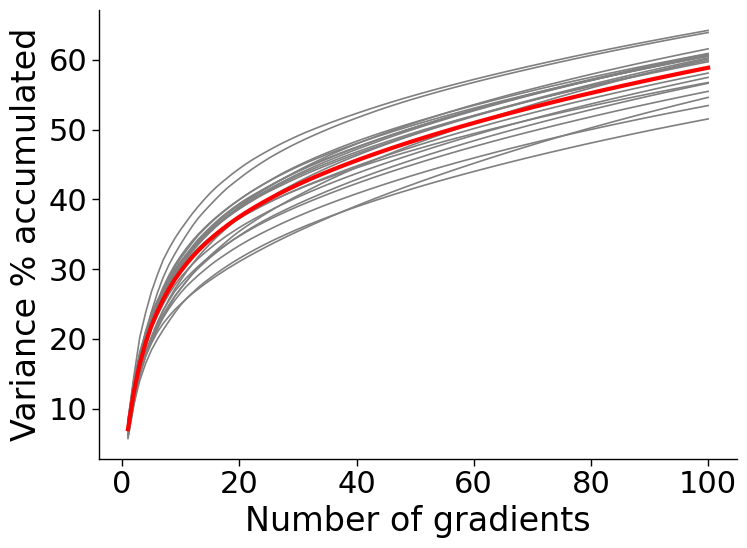

In [35]:
lambdas_acc = np.zeros((n,100))
for i in range(100):
  for j in range(n):
    lambdas_acc[j,i] = lambdas[j][:i+1].sum() * 100
sns.set_context("paper", font_scale = 2.5)
fig, ax = plt.subplots(figsize=(8,6))
for i in range(n):
  plt.plot(range(1,101),lambdas_acc[i], color='grey')

ax.plot(range(1,101),lambdas_acc.mean(axis=0),lw=3,color='red')

ax.set_xlabel('Number of gradients')
ax.set_ylabel('Variance % accumulated')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
fig.savefig('../../figures/indi_lambdas_fsLR_mmp.png', transparent=True, dpi=300)

In [102]:
glucose = np.zeros((n,360))
glucose_asy = np.zeros((n,180))
for i in range(n):
  glucose_raw = np.loadtxt('../../results/glucose/individual/'+sub_list[i]+'_fsLR_mmp.txt')
  glucose_l = ss.zscore(glucose_raw[:180])
  glucose_r = ss.zscore(glucose_raw[180:])
  glucose[i] = np.concatenate((glucose_l, glucose_r))
  glucose_asy[i] = glucose_l - glucose_r

In [12]:
corr = np.zeros((n,max_mode))
for i in range(n):
  for j in range(max_mode):
    glm = OLS(glucose[i], gradient[i][:,:j+1]).fit()
    corr[i,j]=glm.rsquared_adj

s003_r2 = 0.56108
s007_r2 = 0.37466
s012_r2 = 0.56937
s014_r2 = 0.38733
s017_r2 = 0.36315
s020_r2 = 0.51112
s023_r2 = 0.32744
s025_r2 = 0.41833
s026_r2 = 0.35285
s028_r2 = 0.47721
s029_r2 = 0.43775
s030_r2 = 0.55575
s031_r2 = 0.49922
s032_r2 = 0.3506
s033_r2 = 0.45087
s034_r2 = 0.5242
s035_r2 = 0.52352
s036_r2 = 0.28622
s037_r2 = 0.47629
s038_r2 = 0.39654
mean_r2 = 0.44218  std_r2 = 0.08288


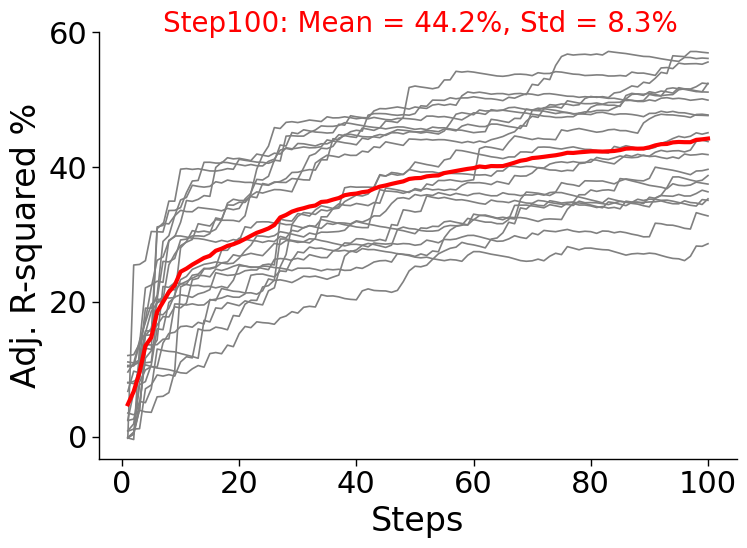

In [31]:
sns.set_context("paper", font_scale = 2.5)
fig, ax = plt.subplots(figsize=(8,6))
for i in range(n):
  ax.plot(range(1,max_mode+1), corr[i]*100, color='grey')
  print(sub_list[i]+'_r2 =', corr[i][99].round(5))

ax.plot(range(1,max_mode+1), corr.mean(axis=0)*100, color='red', lw=3)
print('mean_r2 =', corr[:,99].mean().round(5), ' std_r2 =', corr[:,99].std().round(5))

ax.set_xlabel('Steps')
ax.set_ylabel('Adj. R-squared %')
ax.text(0.1,1,'Step100: Mean = '+str(corr[:,99].mean().round(3)*100)+'%, Std = '+str(corr[:,99].std().round(3)*100)+'%',
        fontsize=20, transform=ax.transAxes, color='red')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
fig.savefig('../../figures/indi_fitting_fsLR_mmp.png', transparent=True, dpi=300)

In [40]:
sub_corr = np.zeros(n)
for i in range(n):
  sub_corr[i] = ss.pearsonr(lambdas_acc[i], corr[i])[0]
  print(sub_list[i]+'_r =', ss.pearsonr(lambdas_acc[i], corr[i]))

s003_r = PearsonRResult(statistic=0.9632772361151098, pvalue=9.100465820895842e-58)
s007_r = PearsonRResult(statistic=0.924400560161791, pvalue=8.25108684573383e-43)
s012_r = PearsonRResult(statistic=0.9489662670304011, pvalue=6.499969082285364e-51)
s014_r = PearsonRResult(statistic=0.9792041909632719, pvalue=1.0544217730850695e-69)
s017_r = PearsonRResult(statistic=0.9512267342030333, pvalue=7.455360016678125e-52)
s020_r = PearsonRResult(statistic=0.8802717825853379, pvalue=1.689622065163989e-33)
s023_r = PearsonRResult(statistic=0.9426437442084253, pvalue=1.70628871218489e-48)
s025_r = PearsonRResult(statistic=0.9861828799073004, pvalue=2.480508856066446e-78)
s026_r = PearsonRResult(statistic=0.933611242504002, pvalue=1.7747500756881863e-45)
s028_r = PearsonRResult(statistic=0.971638589145612, pvalue=3.529063185852596e-63)
s029_r = PearsonRResult(statistic=0.9487308703580646, pvalue=8.098004807931343e-51)
s030_r = PearsonRResult(statistic=0.9765578972440738, pvalue=3.5051738698848935

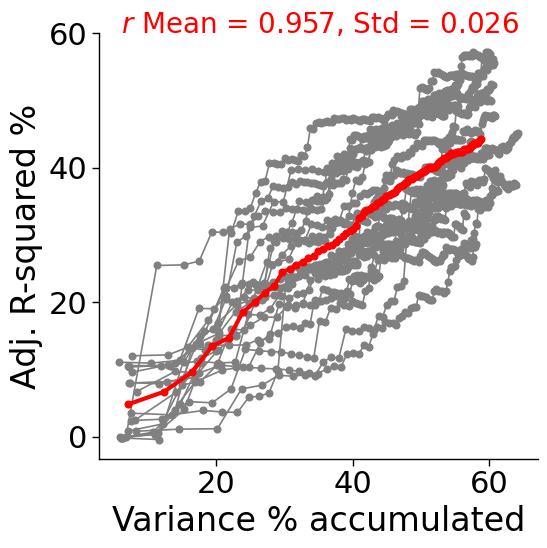

In [44]:
sns.set_context("paper", font_scale = 2.5)
fig, ax = plt.subplots(figsize=(6,6))
for i in range(n):
  ax.plot(lambdas_acc[i],corr[i]*100,marker='o',color='grey')

ax.plot(lambdas_acc.mean(axis=0),corr.mean(axis=0)*100,marker='o',lw=3,color='red') 

ax.text(0.05,1,'$\it{r}$ Mean = '+str(sub_corr.mean().round(3))+', Std = '+str(sub_corr.std().round(3)),
        fontsize=20, transform=ax.transAxes, color='red')
ax.spines['right'].set_visible(False)
#ax.set_yticks([-0.3,0,0.3])
ax.set_xlabel('Variance % accumulated')
ax.set_ylabel('Adj. R-squared %')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
fig.savefig('../../figures/indi_variance_r2_fsLR_mmp.png', transparent=True, dpi=300)

# ASYMMETRY

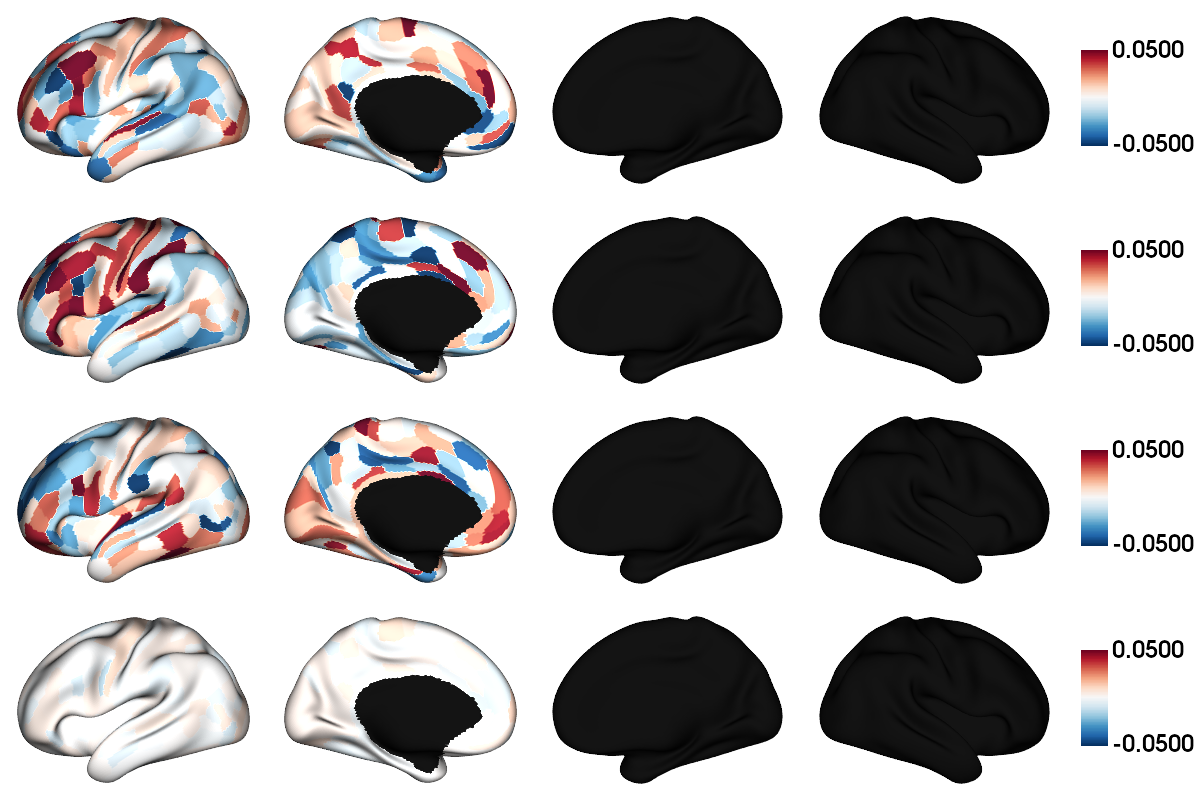

In [94]:
lhlh = [np.loadtxt('../../results/grad/asymmetry/'+sub_list[i]+'/grad_sparsity_0.9_fsLR_mmp_lh_aligned.txt') for i in range(n)]
rhrh = [np.loadtxt('../../results/grad/asymmetry/'+sub_list[i]+'/grad_sparsity_0.9_fsLR_mmp_rh_aligned.txt') for i in range(n)]
grad_asy = np.array(lhlh) - np.array(rhrh)
spa = [0,1,2,99]
grad_asy_plot = np.concatenate((grad_asy, np.zeros((n,180,100))),axis=1)
plot = [None] * 4
sub=4
for i in range(4):
  plot[i] = mmp_fsLR.copy()
  for node in range(360):
    plot[i][mmp_fsLR==node+1] = grad_asy_plot[sub][:,spa[i]][node]
  plot[i][plot[i]==0] = np.nan

fp.plot_surface(data = plot, surf='fsLR', color_range=(-0.05,0.05),
                size = (1200, 800), 
                cmap = 'RdBu_r', filename = '../../figures/sub_'+sub_list[sub]+'_asy_grad_fsLR_mmp_sparsity_0.9.png',
                display=True)

In [95]:
#  Left for right
r_ll = np.zeros((n,max_mode))
r_lr = np.zeros((n,max_mode))
for i in range(n):
  for j in range(max_mode):
    glm = LinearRegression()
    glm.fit(lhlh[i][:,:j+1], glucose[i,:180])
    tmp = glm.predict(lhlh[i][:180,:j+1])
    r_ll[i,j]=np.corrcoef(glucose[i,:180], tmp)[0,1]
    tmp = glm.predict(rhrh[i][:,:j+1])
    r_lr[i,j]=np.corrcoef(glucose[i,180:], tmp)[0,1]

In [96]:
#  Right for Left
r_rl = np.zeros((n,max_mode))
r_rr = np.zeros((n,max_mode))
for i in range(n):
  for j in range(max_mode):
    glm = LinearRegression()
    glm.fit(rhrh[i][:,:j+1], glucose[i,180:])
    tmp = glm.predict(rhrh[i][:,:j+1])
    r_rr[i,j]=np.corrcoef(glucose[i,180:], tmp)[0,1]
    tmp = glm.predict(lhlh[i][:,:j+1])
    r_rl[i,j]=np.corrcoef(glucose[i,:180], tmp)[0,1]

In [124]:
num

1

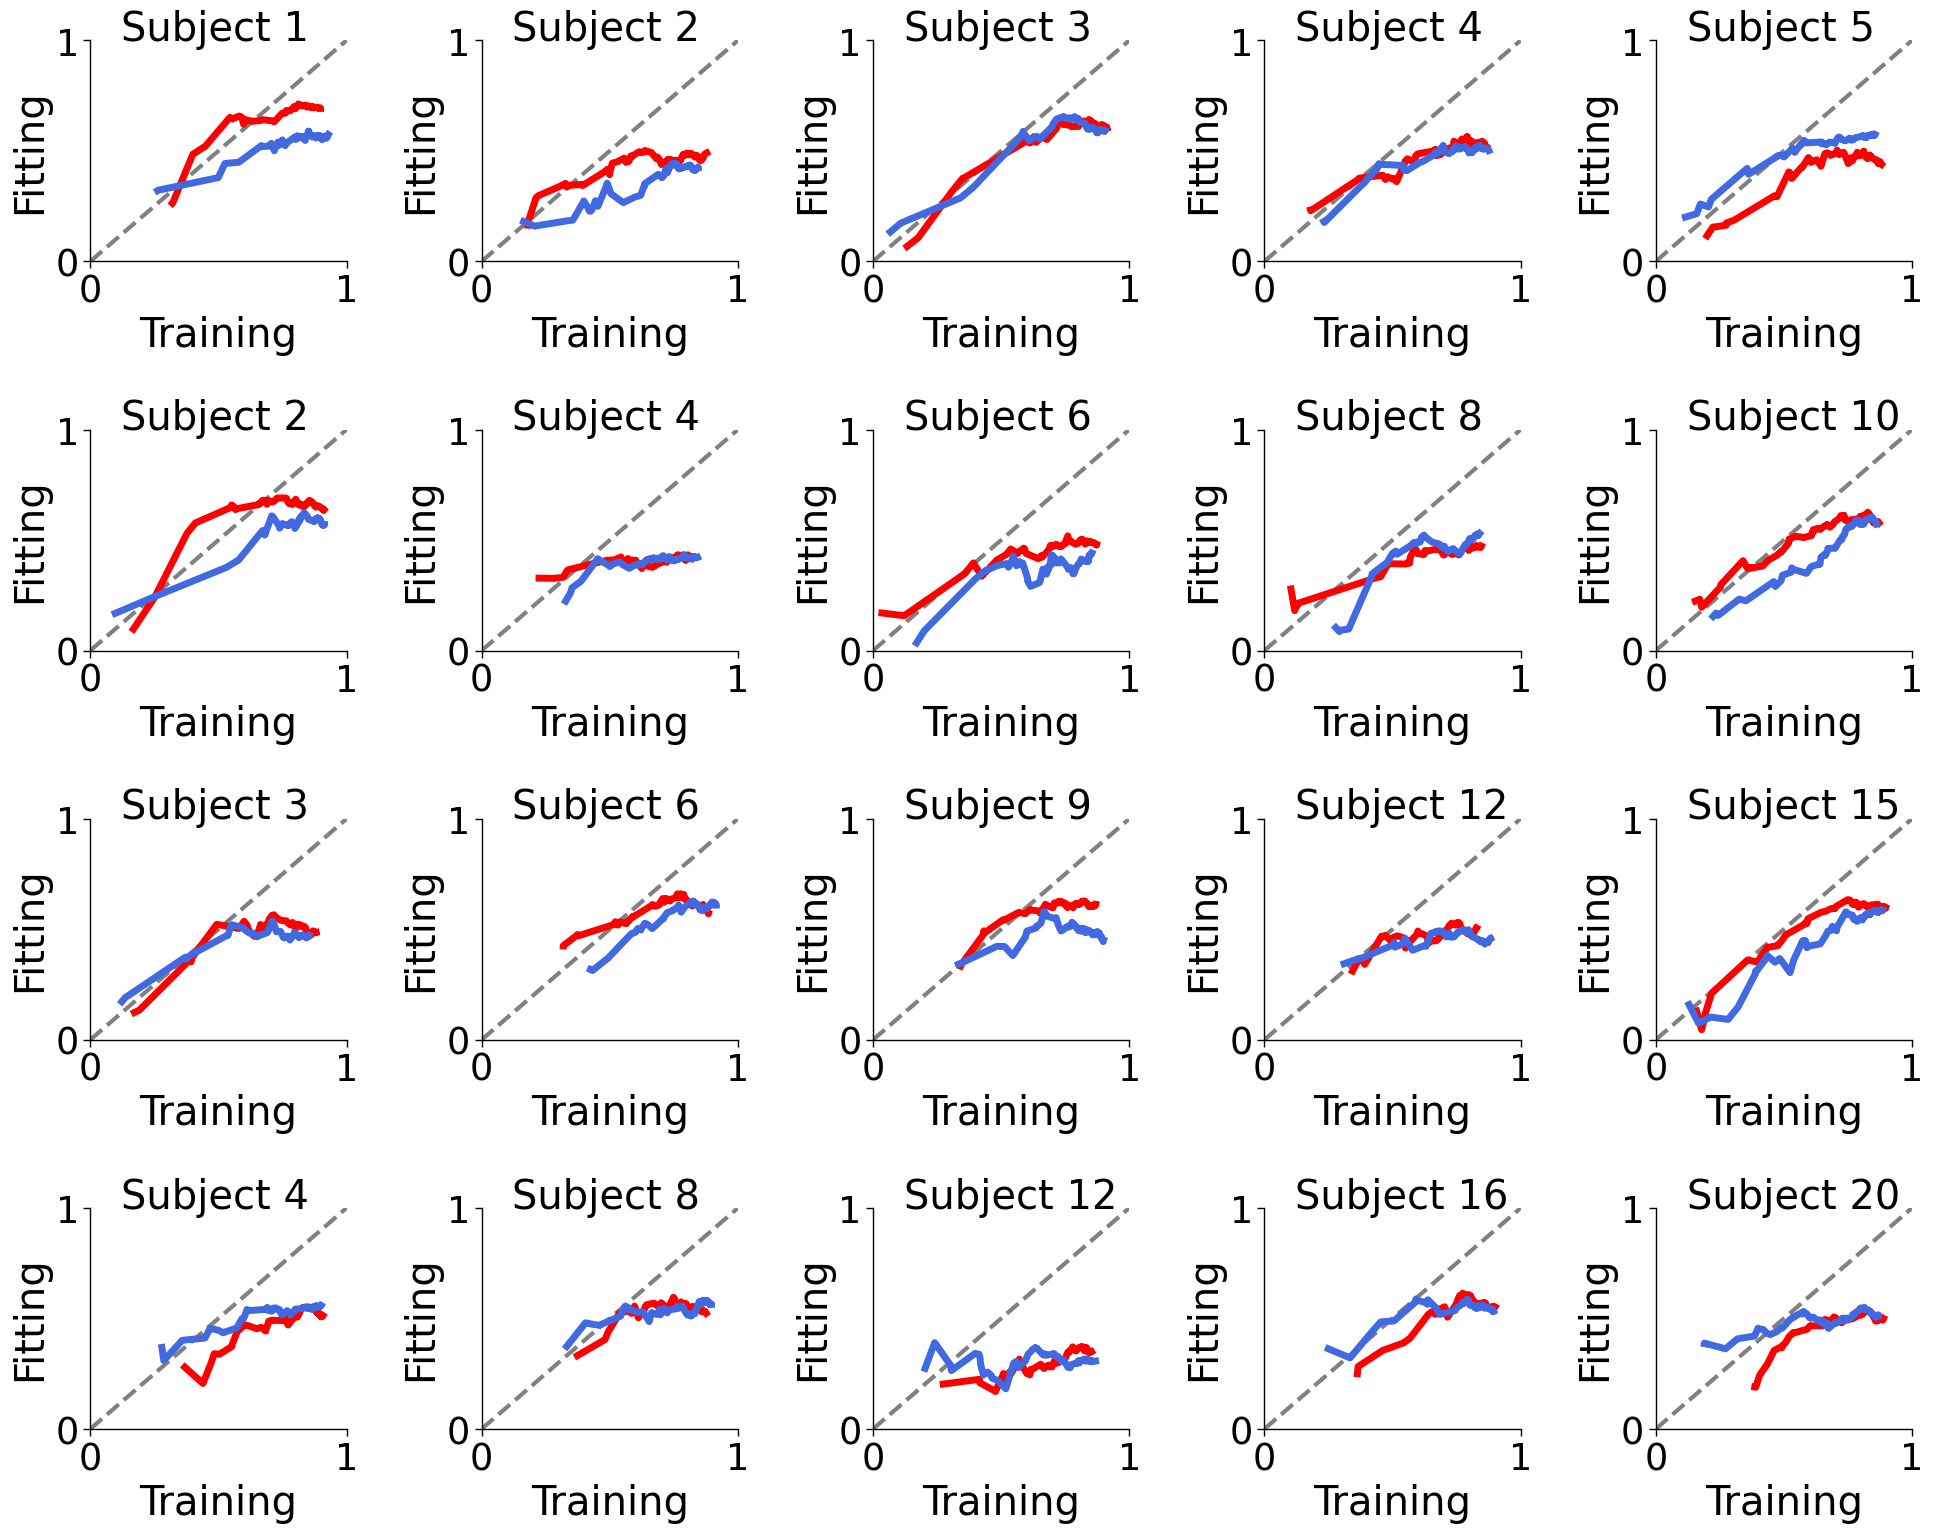

In [131]:
sns.set_context("paper", font_scale = 3)
fig, ax = plt.subplots(4,5,figsize=(20,16))
for i in range(4):
  for j in range(5):
    ax[i,j].plot([0,1], [0,1], c='gray', ls='--', lw=3)
    ax[i,j].plot(r_ll.reshape(4,5,max_mode)[i,j], r_lr.reshape(4,5,max_mode)[i,j], c='red', lw=5)
    ax[i,j].plot(r_rr.reshape(4,5,max_mode)[i,j], r_rl.reshape(4,5,max_mode)[i,j], c='royalblue', lw=5)
    ax[i,j].set_xlabel('Training')
    ax[i,j].set_ylabel('Fitting')
    ax[i,j].set_xlim(0,1)
    ax[i,j].set_ylim(0,1)
    ax[i,j].set_xticks([0, 1])
    ax[i,j].set_yticks([0, 1])
    ax[i,j].text(0.12,1, 'Subject ' + str((i+1)*(j+1)), transform=ax[i,j].transAxes)
    ax[i,j].spines['right'].set_visible(False)
    ax[i,j].spines['top'].set_visible(False)
fig.tight_layout()
fig.savefig('../../figures/indi_fitting_diag_fsLR_mmp.png', transparent=True, dpi=300)

In [103]:
r_asy = np.zeros((n,max_mode))
for i in range(n):
  for j in range(max_mode):
    glm = LinearRegression()
    glm.fit(grad_asy[i][:,:j+1], glucose_asy[i])
    tmp = glm.predict(grad_asy[i][:,:j+1])
    r_asy[i,j]=np.corrcoef(glucose_asy[i], tmp)[0,1]

In [104]:
corr = np.zeros((n,max_mode))
for i in range(n):
  for j in range(max_mode):
    glm = OLS(glucose_asy[i], grad_asy[i][:,:j+1]).fit()
    corr[i,j]=glm.rsquared_adj

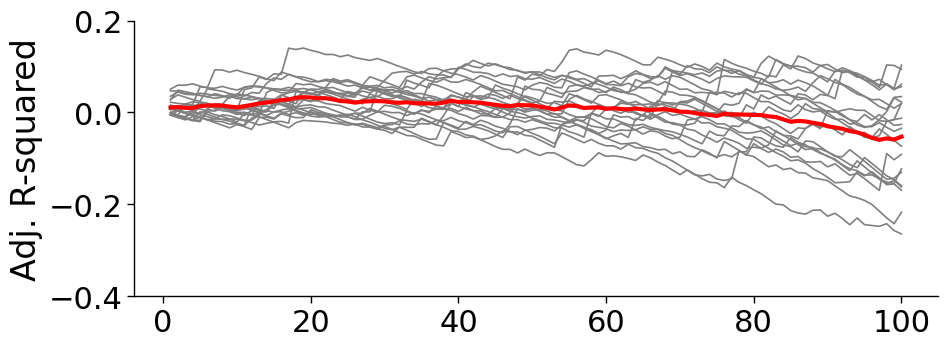

In [112]:
sns.set_context("paper", font_scale = 2.5)
fig, ax = plt.subplots(figsize=(10,4))
for i in range(n):
  ax.plot(range(1,max_mode+1), corr[i], color='gray')
ax.plot(range(1,max_mode+1), corr.mean(axis=0), c='red',lw=3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Adj. R-squared')
ax.set_yticks([-0.4,-0.2,0,0.2])
fig.tight_layout()
fig.savefig('../../figures/indi_fitting_asy_sparsity_0.9_fsLR_mmp.png', transparent=True, dpi=300)

In [113]:
grad_asy.shape

(20, 180, 100)

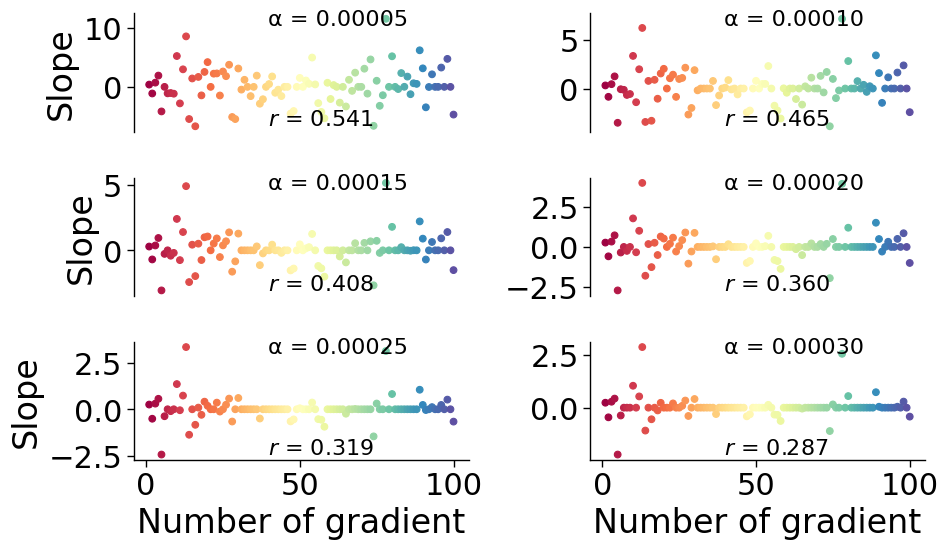

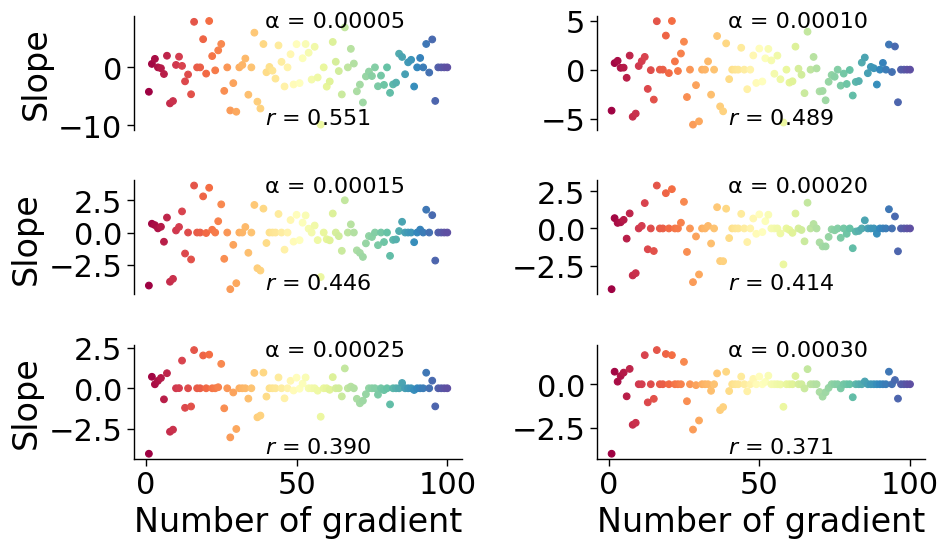

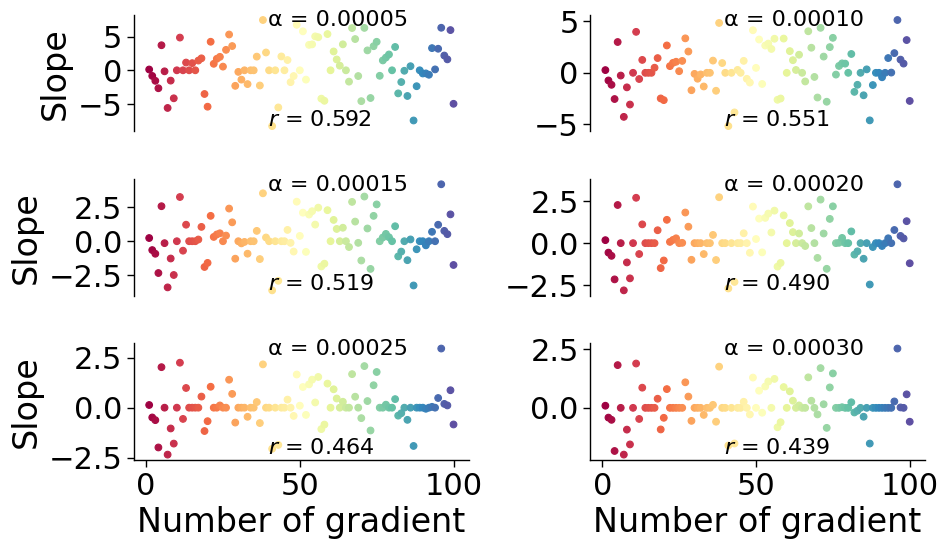

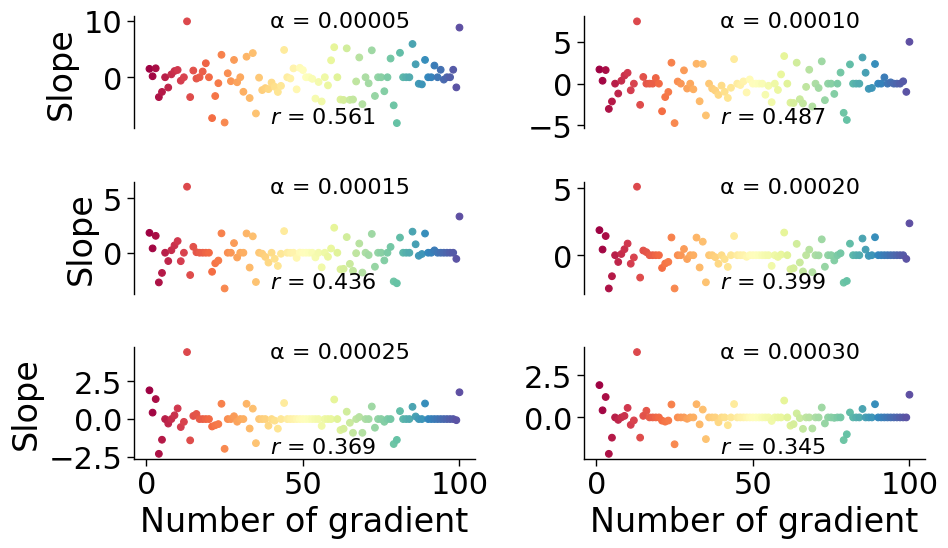

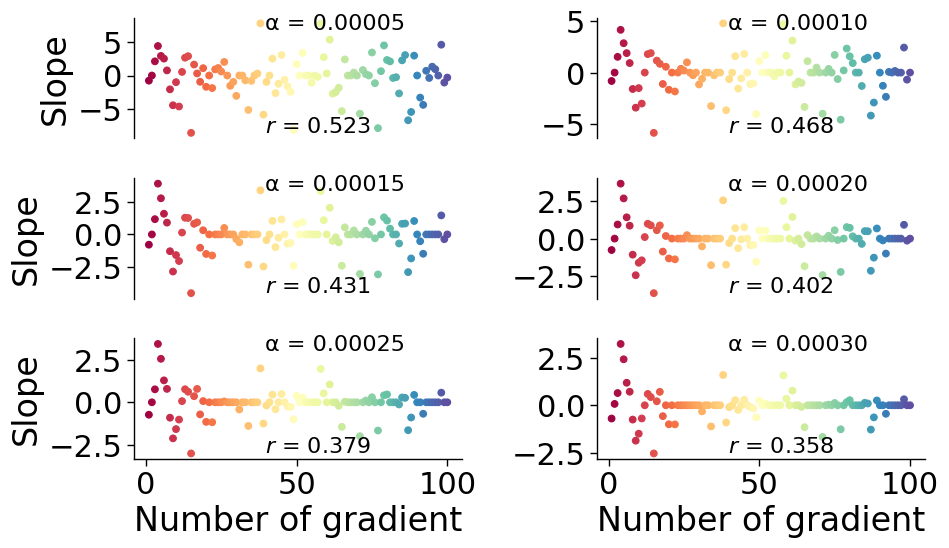

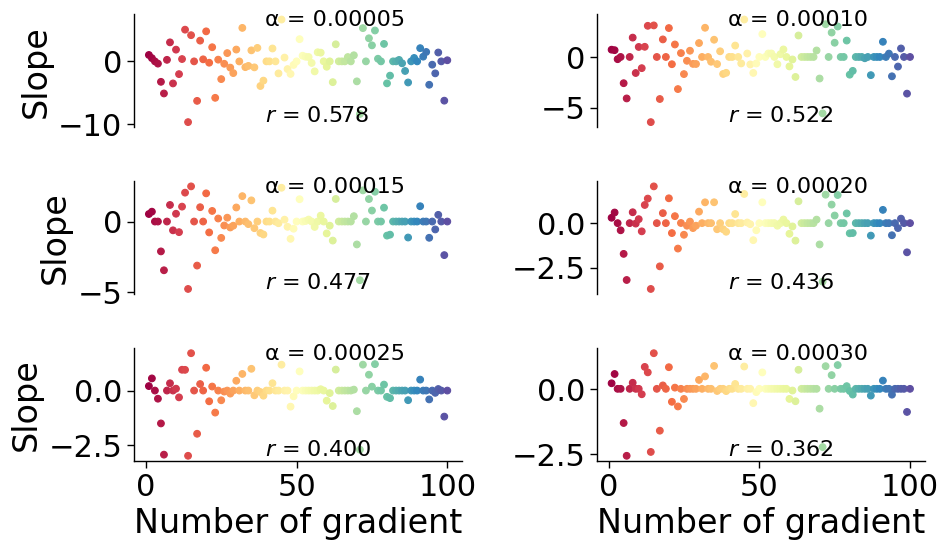

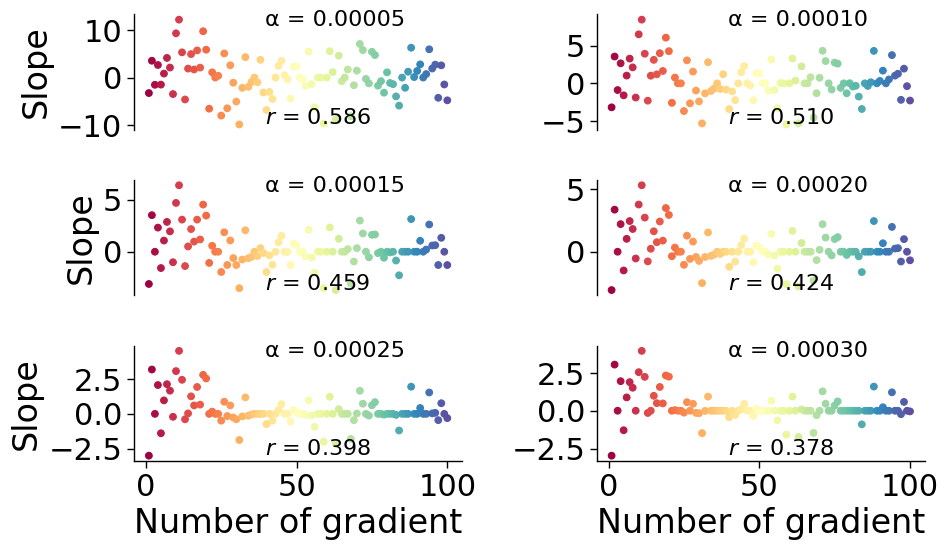

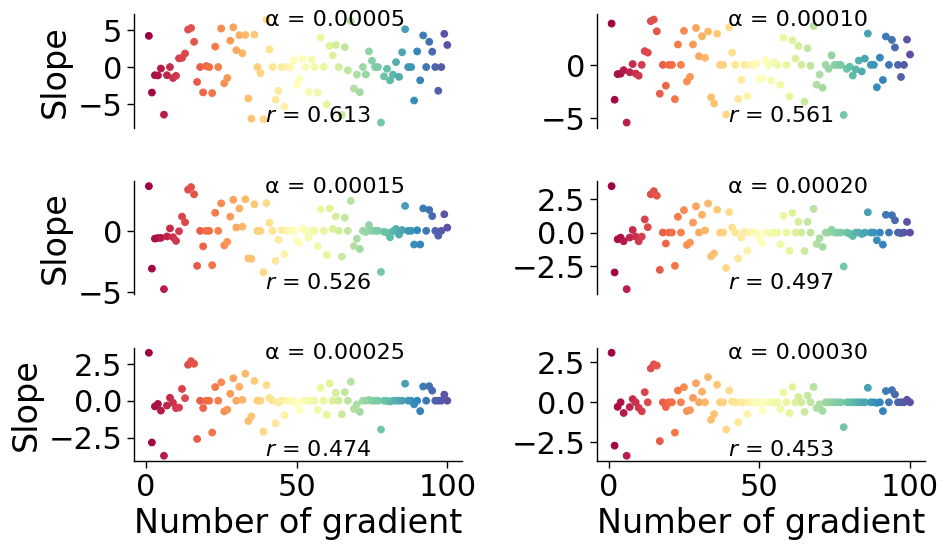

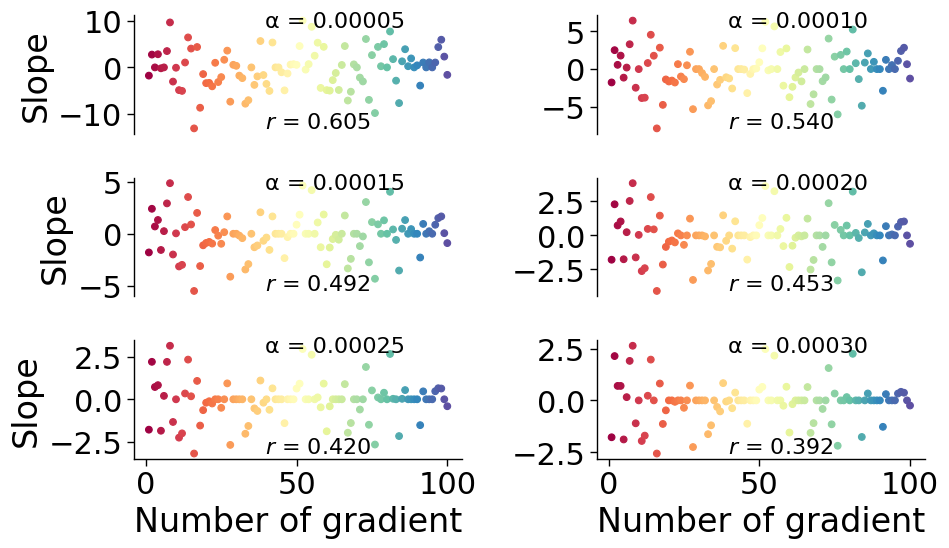

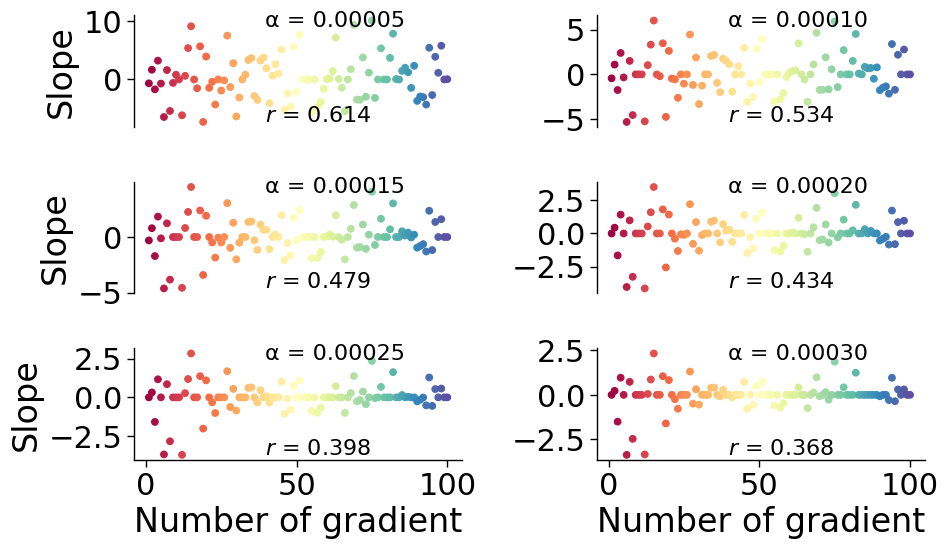

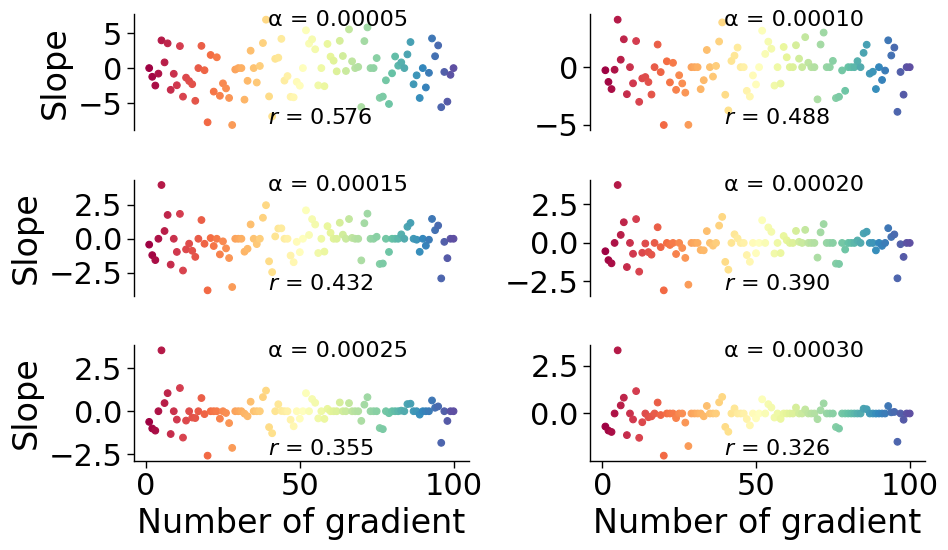

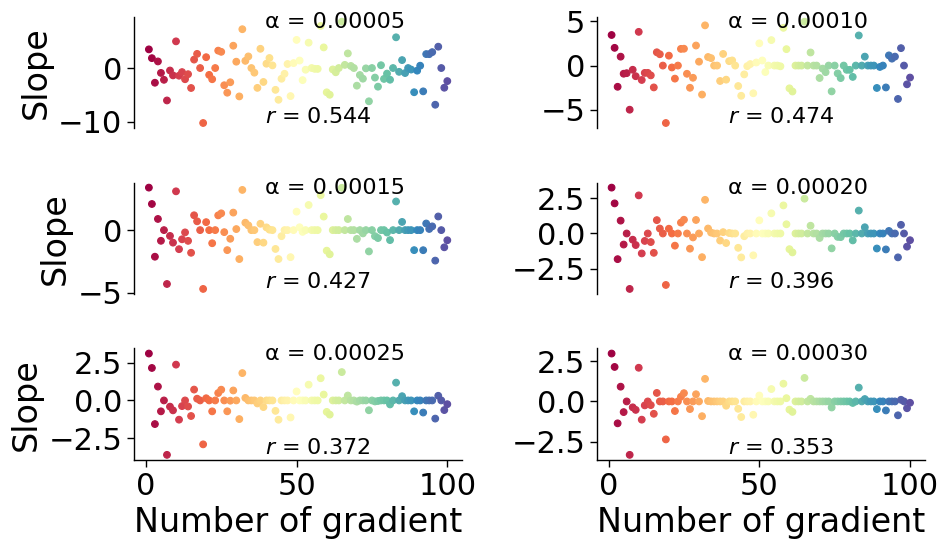

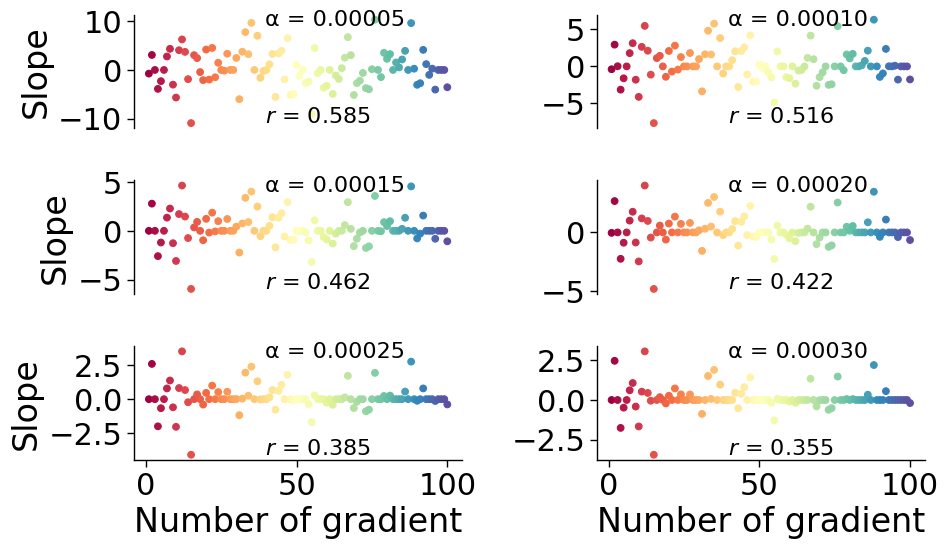

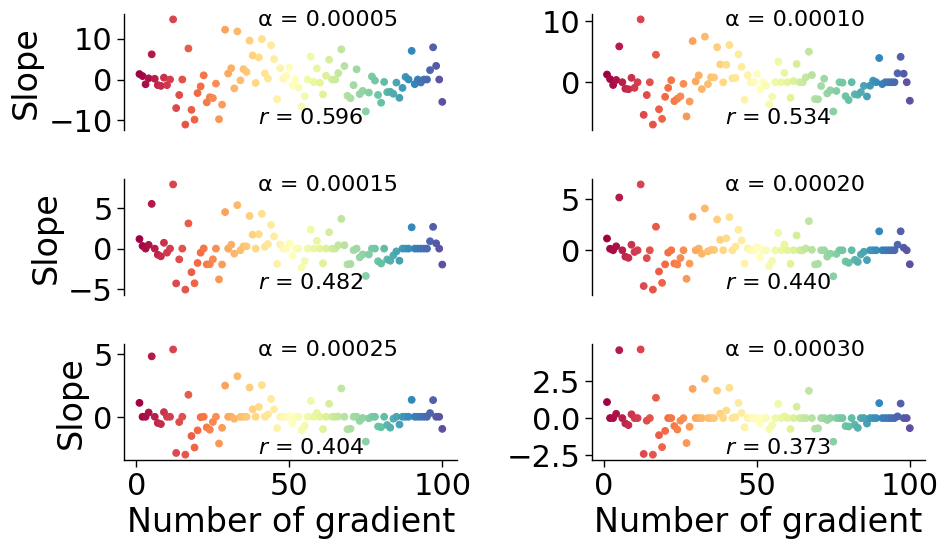

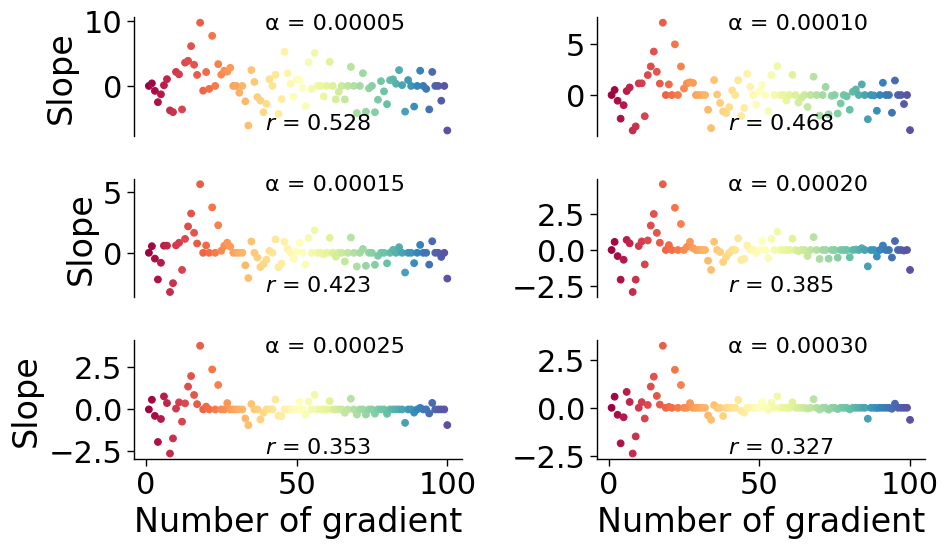

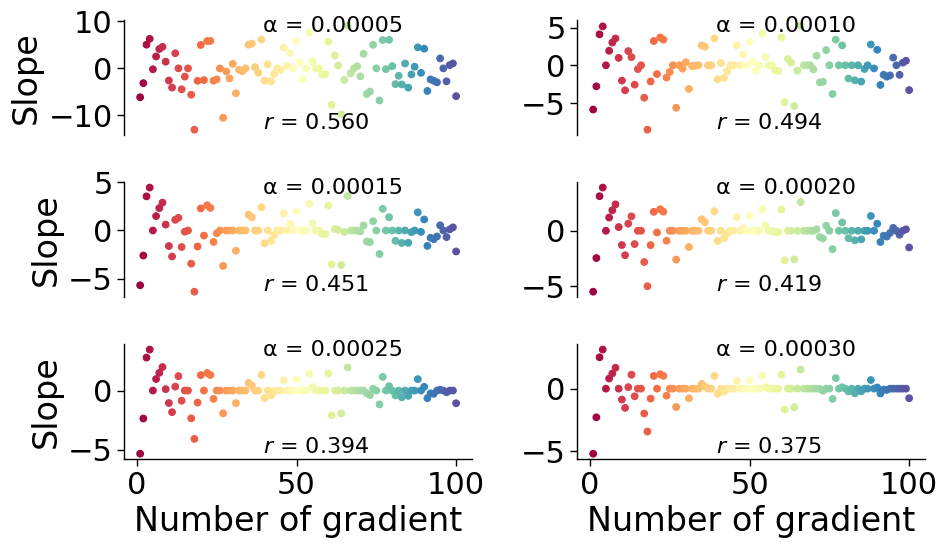

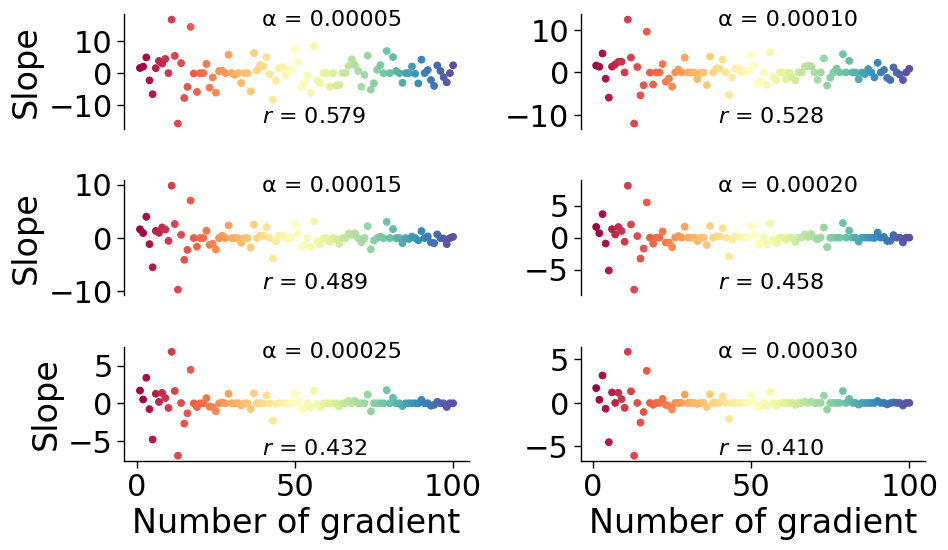

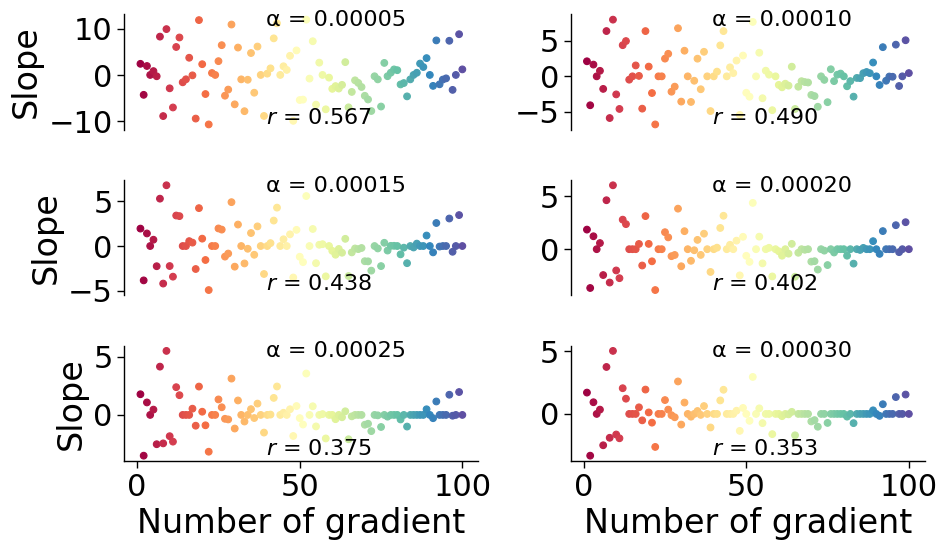

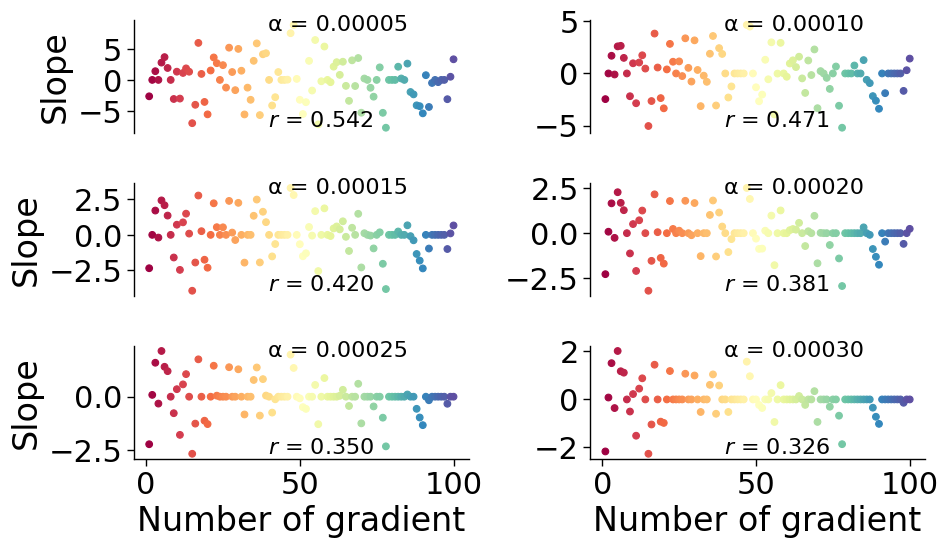

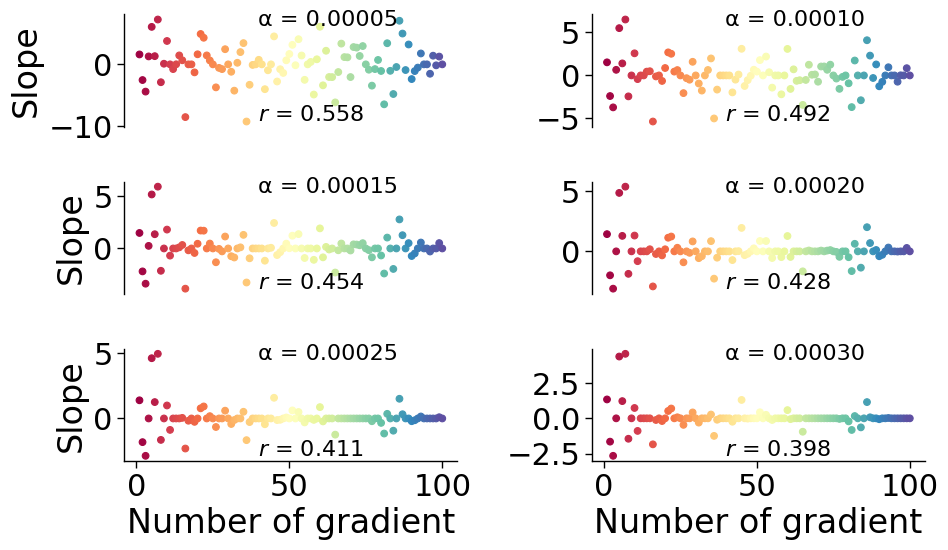

In [117]:
alphas = np.array([[0.00005,0.00010],[0.00015,0.00020],[0.00025,0.0003]])
for sub in range(n):
  sns.set_context("paper", font_scale = 2.5)
  fig, ax = plt.subplots(3,2,figsize=(10,6))
  for i in range(3):
    for j in range(2):
      glm = OLS(glucose_asy[sub], grad_asy[sub][:,:101]).fit_regularized(alpha=alphas[i,j], L1_wt=0.5)
      y_pred = glm.predict(grad_asy[sub][:,:101])
      rp = ss.pearsonr(glucose_asy[sub], y_pred)
      ax[i,j].scatter(range(1,101), glm.params,cmap='Spectral',c=range(1,101))
      ax[i,0].set_ylabel('Slope')
      ax[i,j].spines['right'].set_visible(False)
      ax[i,j].spines['top'].set_visible(False)
      ax[i,j].spines['bottom'].set_visible(False)
      ax[i,j].set_xticks([])
      #ax[i,j].set_yticks([-3,0,3])
      ax[i,j].text(0.4,0.9,'\u03B1 = '+format(alphas[i,j], '.5f'), fontsize=16, transform=ax[i,j].transAxes)
      ax[i,j].text(0.4,0.05,'$\it{r}$ = '+format(rp[0], '.3f'), fontsize=16, transform=ax[i,j].transAxes)
  ax[i,0].spines['bottom'].set_visible(True)
  ax[i,0].set_xticks([0,50,100])  
  ax[i,0].set_xlabel('Number of gradient')
  ax[i,1].spines['bottom'].set_visible(True)
  ax[i,1].set_xticks([0,50,100])  
  ax[i,1].set_xlabel('Number of gradient')
  fig.tight_layout()
  fig.savefig('../../figures/'+sub_list[sub]+'_ElasticNet_asy_sparsity_0.9_fsLR_mmp.png', 
              transparent=True, dpi=300)